In [1]:
import os
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim

C:\Users\PC\AppData\Local\Temp\ipykernel_5904\3911855568.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [98]:
with open(r'D:\Natural_language_processing\Game-of-throne-book\001ssb.txt','r') as file:
    file_content = file.read()
    print(file_content)

A Game Of Thrones 
Book One of A Song of Ice and Fire 
By George R. R. Martin 
PROLOGUE 
"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are 
dead." 
"Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile. 
Gared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go. 
"Dead is dead," he said. "We have no business with the dead." 
"Are they dead?" Royce asked softly. "What proof have we?" 
"Will saw them," Gared said. "If he says they are dead, that's proof enough for me." 
Will had known they would drag him into the quarrel sooner or later. He wished it had been later rather 
than sooner. "My mother told me that dead men sing no songs," he put in. 
"My wet nurse said the same thing, Will," Royce replied. "Never believe anything you hear at a woman's 
tit. There are things to be learned even from the dead." His voice echoed, too loud in the twilit forest. 
Page 1

"We h

In [2]:
story = []

files_name = ['001ssb.txt','002ssb.txt','003ssb.txt','004ssb.txt','005ssb.txt']
folder_path = r'D:/Natural_language_processing/Game-of-throne-book/'

for filename in files_name:
    file = open(os.path.join(folder_path,filename),'r')
    corpus = file.read()
    
    sent_token = sent_tokenize(corpus)
    for sent in sent_token:
        story.append(simple_preprocess(sent))

In [6]:
len(story)

145020

In [3]:
stop = stopwords.words('english')
preprocess_story = []
for sent in story:
    story_in = []
    for word in sent:
        if word not in stop:
            story_in.append(word)
    preprocess_story.append(story_in)

In [170]:
preprocess_story

[['game',
  'thrones',
  'book',
  'one',
  'song',
  'ice',
  'fire',
  'george',
  'martin',
  'prologue',
  'start',
  'back',
  'gared',
  'urged',
  'woods',
  'began',
  'grow',
  'dark',
  'around'],
 ['wildlings', 'dead'],
 ['dead', 'frighten'],
 ['ser', 'waymar', 'royce', 'asked', 'hint', 'smile'],
 ['gared', 'rise', 'bait'],
 ['old', 'man', 'past', 'fifty', 'seen', 'lordlings', 'come', 'go'],
 ['dead', 'dead', 'said'],
 ['business', 'dead'],
 ['dead'],
 ['royce', 'asked', 'softly'],
 ['proof'],
 ['saw', 'gared', 'said'],
 ['says', 'dead', 'proof', 'enough'],
 ['known', 'would', 'drag', 'quarrel', 'sooner', 'later'],
 ['wished', 'later', 'rather', 'sooner'],
 ['mother', 'told', 'dead', 'men', 'sing', 'songs', 'put'],
 ['wet', 'nurse', 'said', 'thing', 'royce', 'replied'],
 ['never', 'believe', 'anything', 'hear', 'woman', 'tit'],
 ['things', 'learned', 'even', 'dead'],
 ['voice', 'echoed', 'loud', 'twilit', 'forest'],
 ['page', 'long', 'ride', 'us', 'gared', 'pointed'],
 ['eig

In [4]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [5]:
model.build_vocab(preprocess_story)

In [6]:
model.train(preprocess_story, total_examples=model.corpus_count, epochs=5)

(4396455, 4579390)

In [11]:
model.wv.most_similar('daenerys')

[('stormborn', 0.9095931053161621),
 ('unburnt', 0.8703596591949463),
 ('adultery', 0.825985312461853),
 ('viserys', 0.8194786310195923),
 ('targaryen', 0.8138091564178467),
 ('rhaella', 0.8101176619529724),
 ('loraq', 0.8049799203872681),
 ('court', 0.8046795725822449),
 ('kith', 0.8018010854721069),
 ('doran', 0.8003770709037781)]

In [12]:
model.wv.doesnt_match(['jon','rikon','robb','arya','sansa','bran'])

'jon'

In [217]:
model.wv.doesnt_match(['bran','rikon','sansa','king'])

'king'

In [214]:
model.wv['king']

array([-0.2099586 , -0.3327328 ,  0.15598914,  2.4934604 , -1.5506804 ,
        0.2160136 ,  0.79415494, -0.36244303, -1.0568331 , -0.77347517,
        0.28907466, -0.9821685 ,  0.43755776,  0.02219567, -0.42254892,
        1.0774797 ,  1.1877291 , -0.4652    , -1.1365807 , -0.681683  ,
        0.41183114,  1.3715663 ,  0.342915  , -3.5777078 ,  0.42309967,
        2.179445  , -1.5074286 ,  0.49734104, -0.5771609 ,  1.8224561 ,
       -1.1862464 ,  1.8788818 ,  0.34718388, -1.1573246 ,  0.11922555,
       -0.31931108, -1.1321776 , -0.61556315, -2.14552   ,  0.9403627 ,
        1.7709305 , -0.93811196, -1.6490139 ,  1.6001014 ,  0.9769678 ,
       -0.5810489 , -1.3262584 , -1.0166802 ,  2.0657766 ,  0.4880955 ,
       -1.4128141 , -0.21678205,  2.7660625 , -0.6778088 , -0.6355454 ,
        2.801053  , -1.9084805 ,  0.8003834 , -1.6219741 ,  1.808142  ,
        1.8824335 ,  0.78125453, -1.290657  ,  1.017244  , -0.19935426,
        1.2260059 , -2.3712583 ,  1.8252951 ,  0.04176045, -0.29

In [218]:
model.wv.similarity('arya','sansa')

0.81297565

In [221]:
model.wv.similarity('sansa','king')

0.116567716

In [8]:
model.wv.get_normed_vectors()

array([[ 0.02231193,  0.10373282,  0.06397878, ..., -0.04413326,
        -0.0379087 ,  0.2146088 ],
       [-0.18088488,  0.08180453,  0.08802426, ..., -0.11712375,
        -0.11302062,  0.17594886],
       [ 0.05709265,  0.02200524,  0.01118645, ..., -0.1028291 ,
         0.05722773, -0.08525626],
       ...,
       [-0.03945607,  0.14003298,  0.04456786, ..., -0.2436389 ,
         0.05838154,  0.10157234],
       [-0.12378071,  0.13332266,  0.0848596 , ..., -0.23550922,
         0.08061109,  0.13456593],
       [-0.11144394,  0.06488235,  0.08858804, ..., -0.21572618,
         0.07294303,  0.04430796]], dtype=float32)

In [226]:
model.wv.get_normed_vectors().shape

(17310, 100)

In [232]:
model.wv.index_to_key

['said',
 'lord',
 'would',
 'one',
 'ser',
 'could',
 'man',
 'king',
 'men',
 'back',
 'well',
 'like',
 'jon',
 'father',
 'old',
 'hand',
 'even',
 'tyrion',
 'never',
 'know',
 'see',
 'made',
 'eyes',
 'black',
 'told',
 'lady',
 'thought',
 'time',
 'long',
 'might',
 'us',
 'come',
 'face',
 'still',
 'head',
 'red',
 'way',
 'boy',
 'page',
 'must',
 'queen',
 'good',
 'two',
 'brother',
 'night',
 'little',
 'took',
 'came',
 'though',
 'say',
 'three',
 'away',
 'dead',
 'son',
 'blood',
 'take',
 'go',
 'half',
 'make',
 'arya',
 'saw',
 'day',
 'white',
 'jaime',
 'first',
 'look',
 'want',
 'much',
 'enough',
 'sword',
 'tell',
 'girl',
 'bran',
 'great',
 'looked',
 'left',
 'knew',
 'asked',
 'gave',
 'maester',
 'called',
 'wall',
 'every',
 'heard',
 'sansa',
 'let',
 'yet',
 'went',
 'turned',
 'dany',
 'need',
 'behind',
 'around',
 'woman',
 'another',
 'snow',
 'beneath',
 'across',
 'knight',
 'keep',
 'grace',
 'found',
 'gold',
 'last',
 'cersei',
 'castle',
 '

In [11]:
y = model.wv.index_to_key
y

['said',
 'lord',
 'would',
 'one',
 'ser',
 'could',
 'man',
 'king',
 'men',
 'back',
 'well',
 'like',
 'jon',
 'father',
 'old',
 'hand',
 'even',
 'tyrion',
 'never',
 'know',
 'see',
 'made',
 'eyes',
 'black',
 'told',
 'lady',
 'thought',
 'time',
 'long',
 'might',
 'us',
 'come',
 'face',
 'still',
 'head',
 'red',
 'way',
 'boy',
 'page',
 'must',
 'queen',
 'good',
 'two',
 'brother',
 'night',
 'little',
 'took',
 'came',
 'though',
 'say',
 'three',
 'away',
 'dead',
 'son',
 'blood',
 'take',
 'go',
 'half',
 'make',
 'arya',
 'saw',
 'day',
 'white',
 'jaime',
 'first',
 'look',
 'want',
 'much',
 'enough',
 'sword',
 'tell',
 'girl',
 'bran',
 'great',
 'looked',
 'left',
 'knew',
 'asked',
 'gave',
 'maester',
 'called',
 'wall',
 'every',
 'heard',
 'sansa',
 'let',
 'yet',
 'went',
 'turned',
 'dany',
 'need',
 'behind',
 'around',
 'woman',
 'another',
 'snow',
 'beneath',
 'across',
 'knight',
 'keep',
 'grace',
 'found',
 'gold',
 'last',
 'cersei',
 'castle',
 '

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=3)

In [9]:
X = pca.fit_transform(model.wv.get_normed_vectors())

In [13]:
X.shape

(17310, 3)

D:\Natural_language_processing\nlp\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


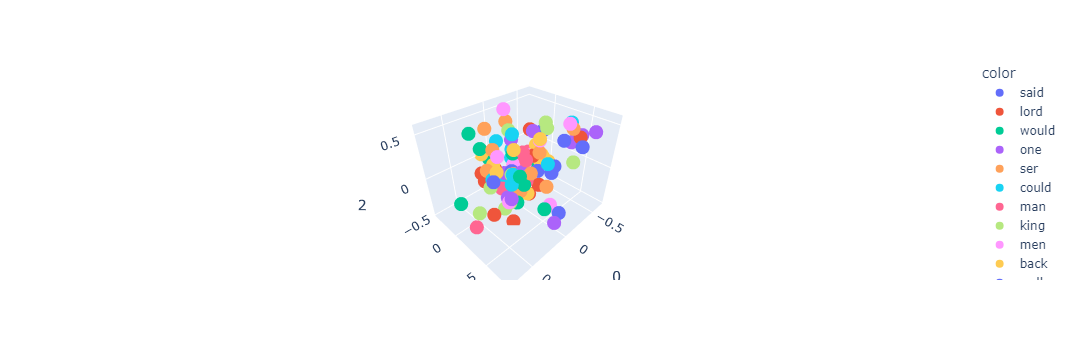

In [12]:
import plotly.express as px
fig = px.scatter_3d(X[:100],x=0,y=1,z=2,color=y[:100])
fig.show()